基本误差线

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<IPython.core.display.Javascript object>


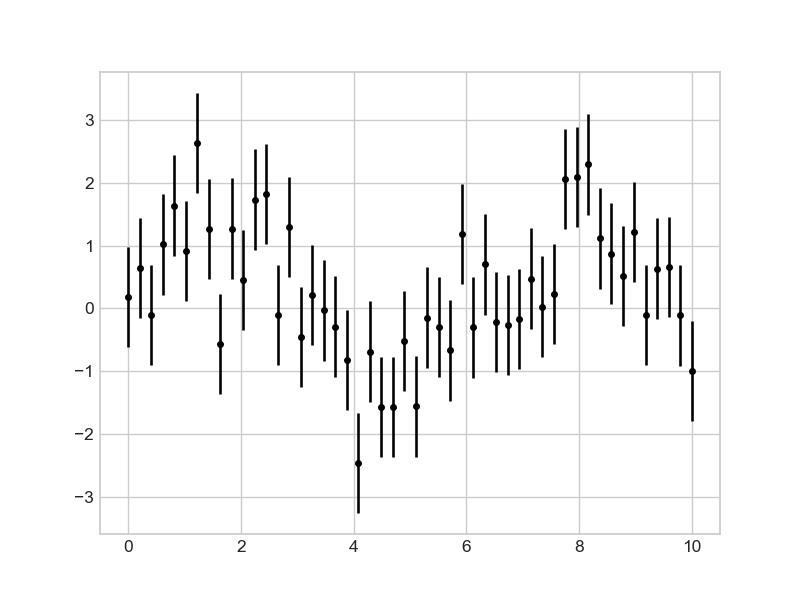

<ErrorbarContainer object of 3 artists>

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

<IPython.core.display.Javascript object>


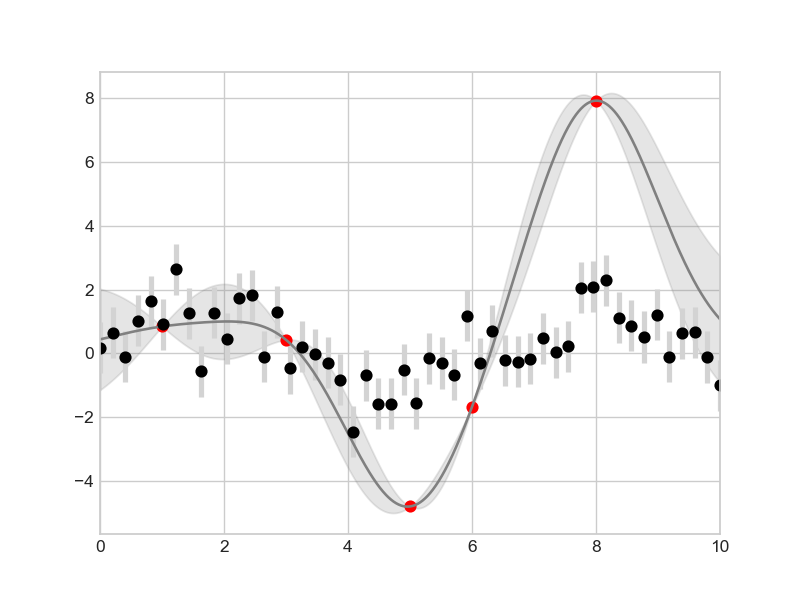

<ErrorbarContainer object of 3 artists>

In [3]:
plt.close()
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

连续误差

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2 * dyfit_ori  # 2*sigma ~ 95% confidence region

<IPython.core.display.Javascript object>


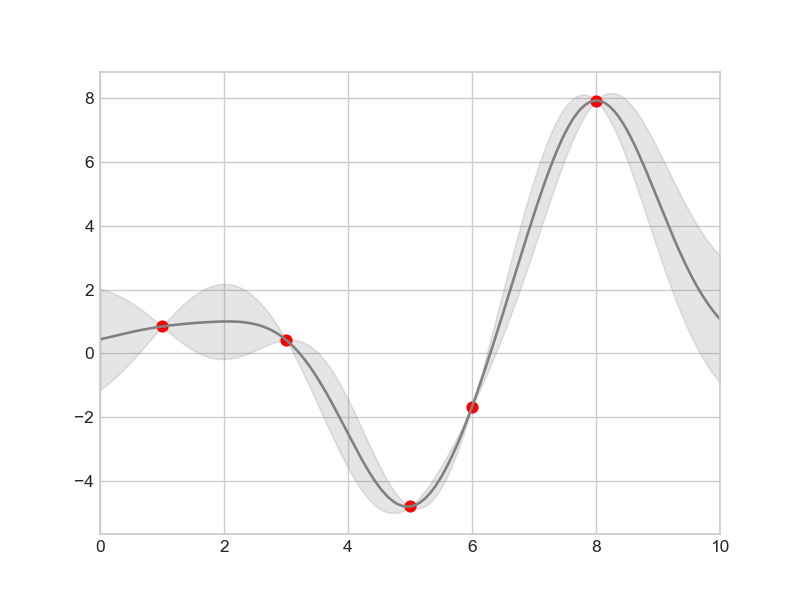

(0.0, 10.0)

In [11]:
plt.close()
plt.plot(xdata, ydata, 'or')
plt.plot(xfit,yfit,'-',color='gray')
plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,color='gray',alpha=0.2)
plt.xlim(0,10)